In [1]:
import os
os.getcwd()

'c:\\Users\\PC\\Desktop\\mlops-mlflow'

## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [3]:
generation = pd.read_csv("./data/Plant_1_Generation_Data.csv")
weather = pd.read_csv("./data/Plant_1_Weather_Sensor_Data.csv")

In [4]:
generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [8]:
generation['DATE_TIME'] = pd.to_datetime(generation['DATE_TIME'], dayfirst=True)
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'], dayfirst=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_24200\2802134372.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'], dayfirst=True)


In [9]:
generation_source_key = list(generation['SOURCE_KEY'].unique())
print('generation source key 갯수 :', len(generation_source_key))

generation source key 갯수 : 22


In [10]:
inv = generation[generation['SOURCE_KEY']==generation_source_key[0]]
mask = ((weather['DATE_TIME'] >= min(inv["DATE_TIME"])) & (weather['DATE_TIME'] <= max(inv["DATE_TIME"])))
weather_filtered = weather.loc[mask]

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=inv["DATE_TIME"], y=inv["AC_POWER"],
                    mode='lines',
                    name='AC Power'))

fig.add_trace(go.Scatter(x=weather_filtered["DATE_TIME"], y=weather_filtered["IRRADIATION"],
                    mode='lines',
                    name='Irradiation', 
                    yaxis='y2'))

fig.update_layout(title_text="Irradiation vs AC POWER",
                  yaxis1=dict(title="AC Power in kW",
                              side='left'),
                  yaxis2=dict(title="Irradiation index",
                              side='right',
                              anchor="x",
                              overlaying="y"
                             ))

fig.show()

In [12]:
df = inv.merge(weather_filtered, on="DATE_TIME", how='left')
df = df[['DATE_TIME', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
df.head()

,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,24.621525,22.165423,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3154 non-null   datetime64[ns]
 1   AC_POWER             3154 non-null   float64       
 2   AMBIENT_TEMPERATURE  3154 non-null   float64       
 3   MODULE_TEMPERATURE   3154 non-null   float64       
 4   IRRADIATION          3154 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 123.3 KB


In [14]:
df_timestamp = df[["DATE_TIME"]]
df_ = df[["AC_POWER", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]

In [15]:
train_prp = .6
train = df_.loc[:df_.shape[0]*train_prp]
test = df_.loc[df_.shape[0]*train_prp:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1893, 1, 4)
X_test shape: (1261, 1, 4)


## Model design

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [18]:
class LSTMAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features):
        super(LSTMAutoencoder, self).__init__()
        # 인코더
        self.encoder_lstm1 = nn.LSTM(input_size=n_features, hidden_size=16, batch_first=True)
        self.encoder_lstm2 = nn.LSTM(input_size=16, hidden_size=4, batch_first=True)

        # 디코더
        self.decoder_lstm1 = nn.LSTM(input_size=4, hidden_size=4, batch_first=True)
        self.decoder_lstm2 = nn.LSTM(input_size=4, hidden_size=16, batch_first=True)
        self.decoder_output = nn.Linear(16, n_features)
        self.seq_len = seq_len

    def forward(self, x):
        x, _ = self.encoder_lstm1(x)
        x, (h_n, _) = self.encoder_lstm2(x)

        x = h_n.repeat(self.seq_len, 1, 1).permute(1, 0, 2)

        x, _ = self.decoder_lstm1(x)
        x, _ = self.decoder_lstm2(x)
        x = self.decoder_output(x)
        return x

In [19]:
def model_traning(epochs, learning_rate, dataloader):
    model = LSTMAutoencoder(seq_len=X_train.shape[1], n_features=X_train.shape[2])
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_x, _ in dataloader:
            output = model(batch_x)
            loss = criterion(output, batch_x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    return model

## Model Optimization

In [37]:
import mlflow
from mlflow.data.pandas_dataset import PandasDataset

mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.create_experiment("mlflow-lab")

In [38]:
mlflow.set_experiment("mlflow-lab")

<Experiment: artifact_location='mlflow-artifacts:/148508904301274675', creation_time=1742975277849, experiment_id='148508904301274675', last_update_time=1742975277849, lifecycle_stage='active', name='mlflow-lab', tags={}>

In [39]:
def mae_visualization(scores):
    scores['datetime'] = df_timestamp.loc[1893:].values
    scores['real AC'] = test['AC_POWER'].values
    scores["loss_mae"] = (scores['real AC'] - scores['AC_POWER']).abs()
    scores['Threshold'] = 200
    scores['Anomaly'] = np.where(scores["loss_mae"] > scores["Threshold"], 1, 0)

    plt.figure(figsize=(12, 6))
    plt.plot(scores['datetime'], scores['loss_mae'], label='Loss (MAE)')
    plt.plot(scores['datetime'], scores['Threshold'], label='Threshold', linestyle='--')
    plt.title("Error Timeseries and Threshold")
    plt.xlabel("DateTime")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./plot/model_mae_plot.png")

In [40]:
def anomaly_visualization(scores):
    anomalies = scores[scores['Anomaly'] == 1][['real AC']]
    anomalies = anomalies.rename(columns={'real AC': 'anomalies'})
    scores = scores.merge(anomalies, left_index=True, right_index=True, how='left')

    plt.figure(figsize=(12, 6))
    plt.plot(scores["datetime"], scores["real AC"], label='AC Power')
    plt.scatter(scores["datetime"], scores["anomalies"], color='red', label='Anomaly', s=40)
    plt.title("Anomalies Detected by LSTM Autoencoder")
    plt.xlabel("DateTime")
    plt.ylabel("AC Power")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./plot/model_anomaly_plot.png")

2025/03/27 15:23:10 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/03/27 15:23:10 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


Epoch 10/10, Loss: 7.7656


2025/03/27 15:23:16 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:19 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:23:19 INFO mlflow.system_metrics.syste

🏃 View run worried-frog-276 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/558f0a33979b4dd1b8b732be3af3e264
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 3.5257


2025/03/27 15:23:25 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:28 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:23:28 INFO mlflow.system_metrics.syste

🏃 View run welcoming-skunk-144 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/459726c7f2e14a52a3a997df63ae7ae7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 7.6381


2025/03/27 15:23:37 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:40 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:23:40 INFO mlflow.system_metrics.syste

🏃 View run grandiose-stoat-730 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/71ada15beda540fb93d8ff94f9e88edc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 6.5215


2025/03/27 15:23:46 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:49 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:23:49 INFO mlflow.system_metrics.syste

🏃 View run caring-yak-240 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/94c08c1cc1934a7c89d249c54bdacb6d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 2.1911


2025/03/27 15:23:55 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:58 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:23:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:23:58 INFO mlflow.system_metrics.syste

🏃 View run abrasive-skink-466 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/c22e61960f994d92a52e22da7e83541b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 6.2545


2025/03/27 15:24:03 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:06 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:24:06 INFO mlflow.system_metrics.syste

🏃 View run peaceful-yak-412 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/ff06223ae44b4c678e049cf7686d2812
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 4.8449


2025/03/27 15:24:10 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:13 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:24:13 INFO mlflow.system_metrics.syste

🏃 View run indecisive-snake-553 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/4844b78bbfd846918deb5db2b96d339f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 1.7706


2025/03/27 15:24:17 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:20 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:24:20 INFO mlflow.system_metrics.syste

🏃 View run kindly-bee-646 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/30ef190187ff4d57a47f8597d3e4ee0d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675
Epoch 10/10, Loss: 5.1000


2025/03/27 15:24:24 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:27 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/27 15:24:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/03/27 15:24:27 INFO mlflow.system_metrics.syste

🏃 View run omniscient-boar-919 at: http://127.0.0.1:5000/#/experiments/148508904301274675/runs/67555cf9f8ae4df1aed008058e4d8980
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148508904301274675


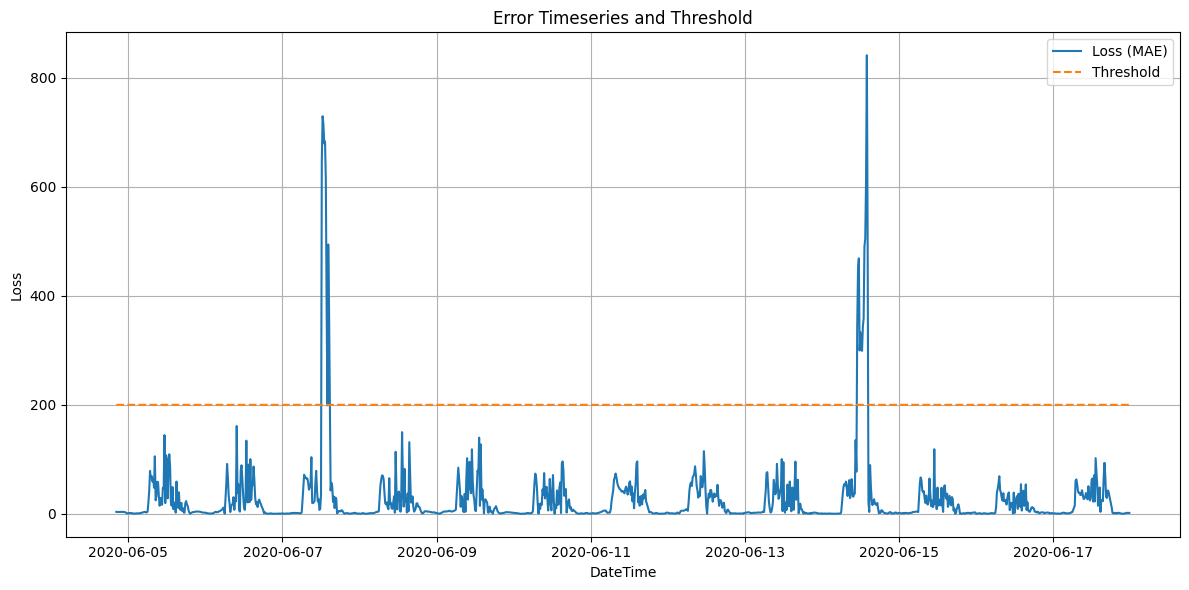

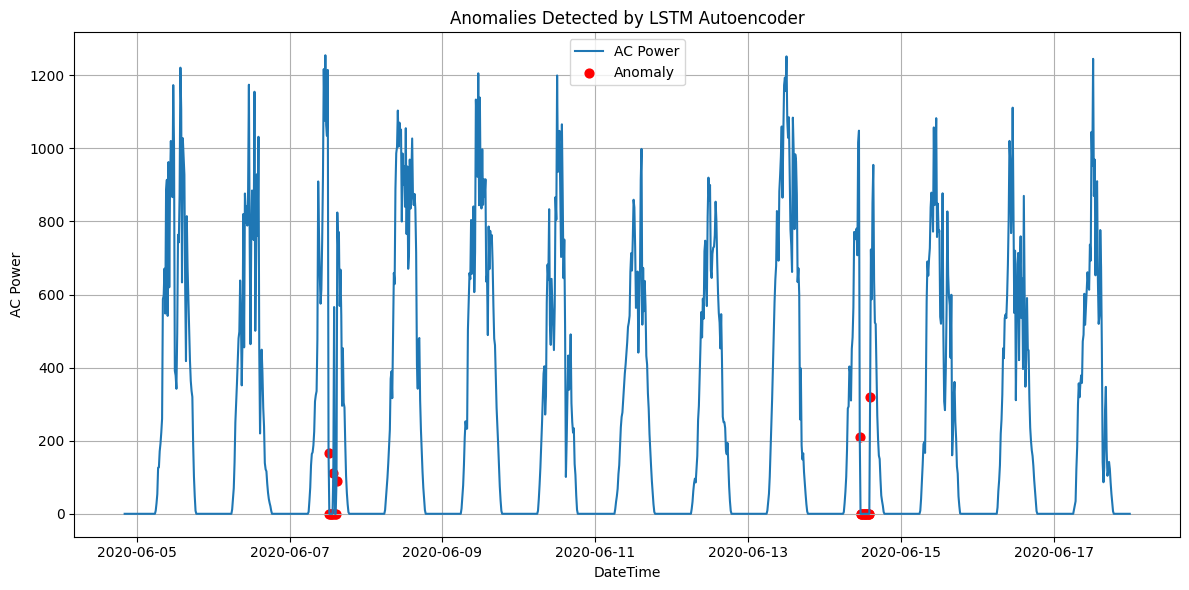

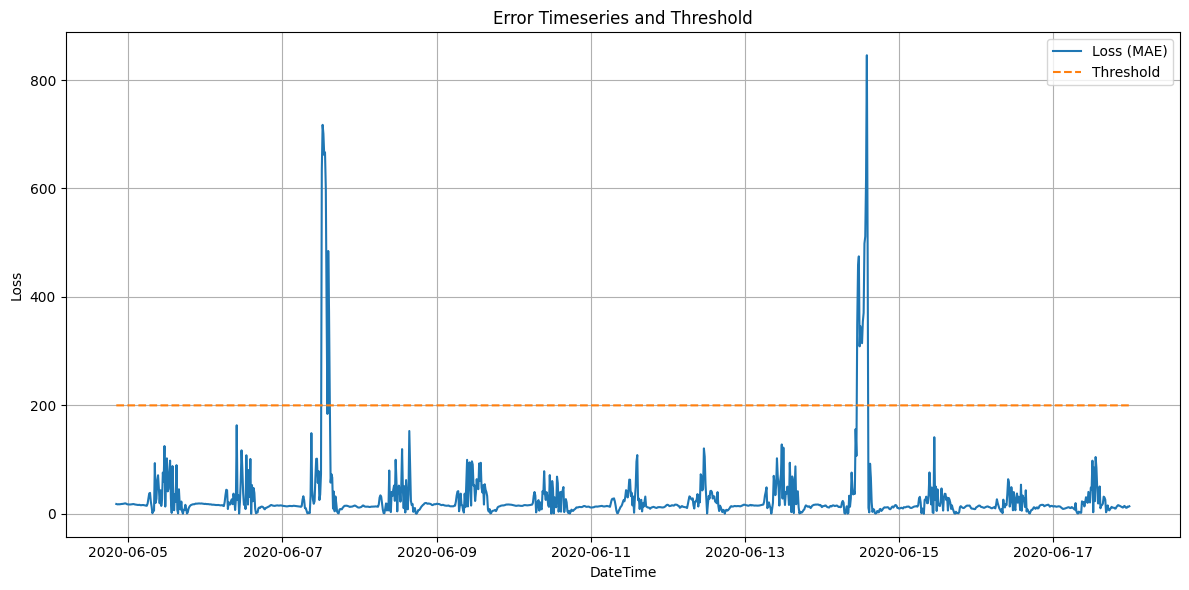

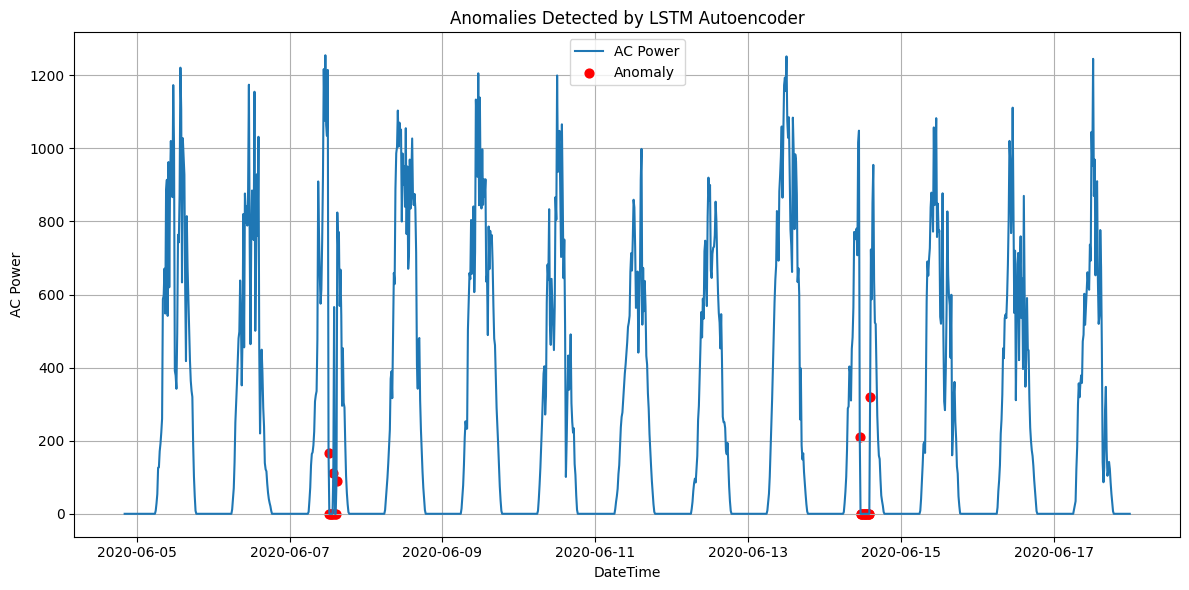

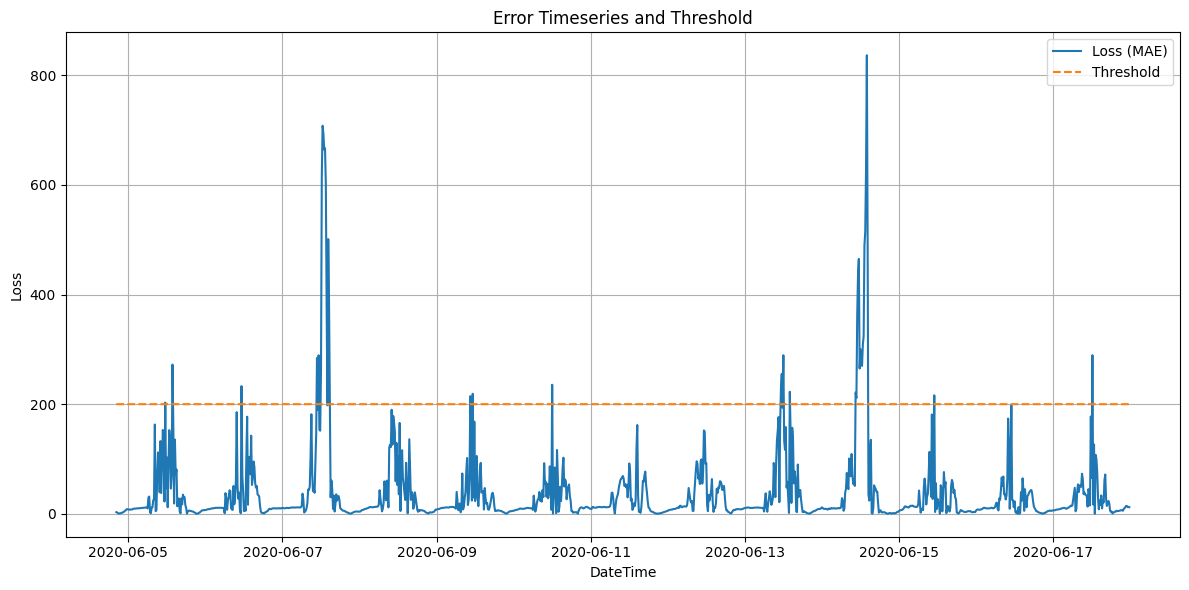

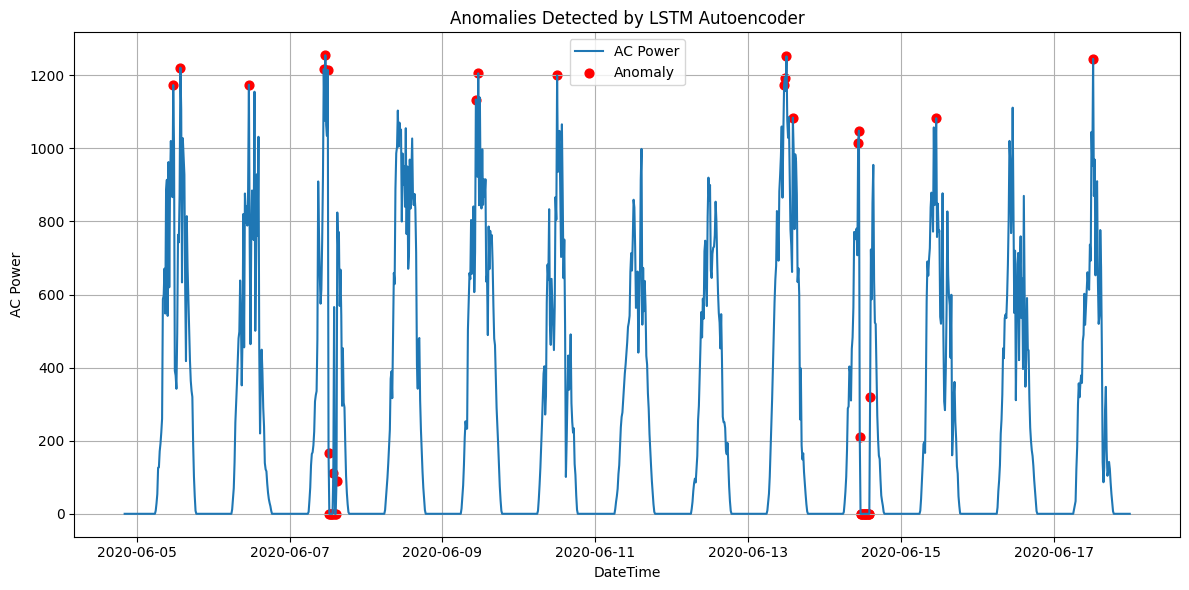

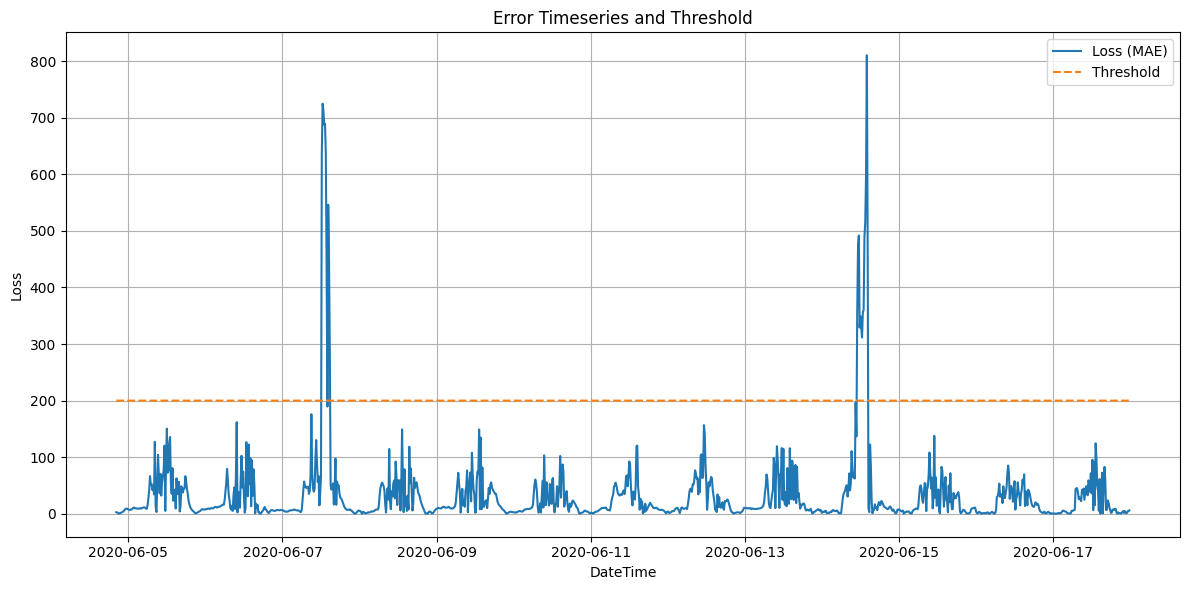

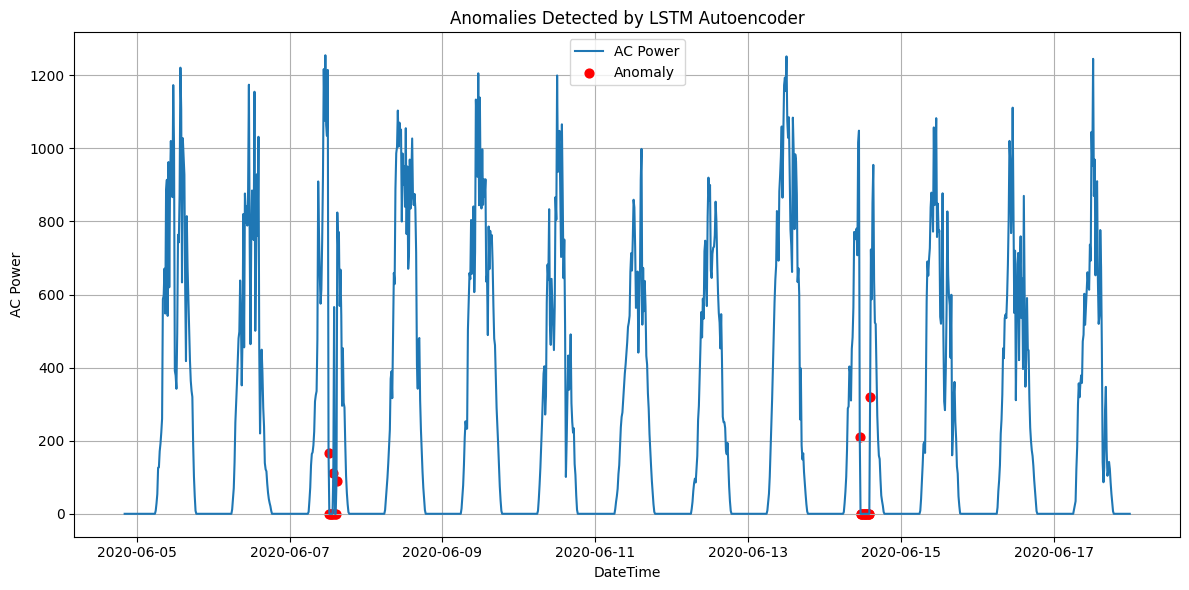

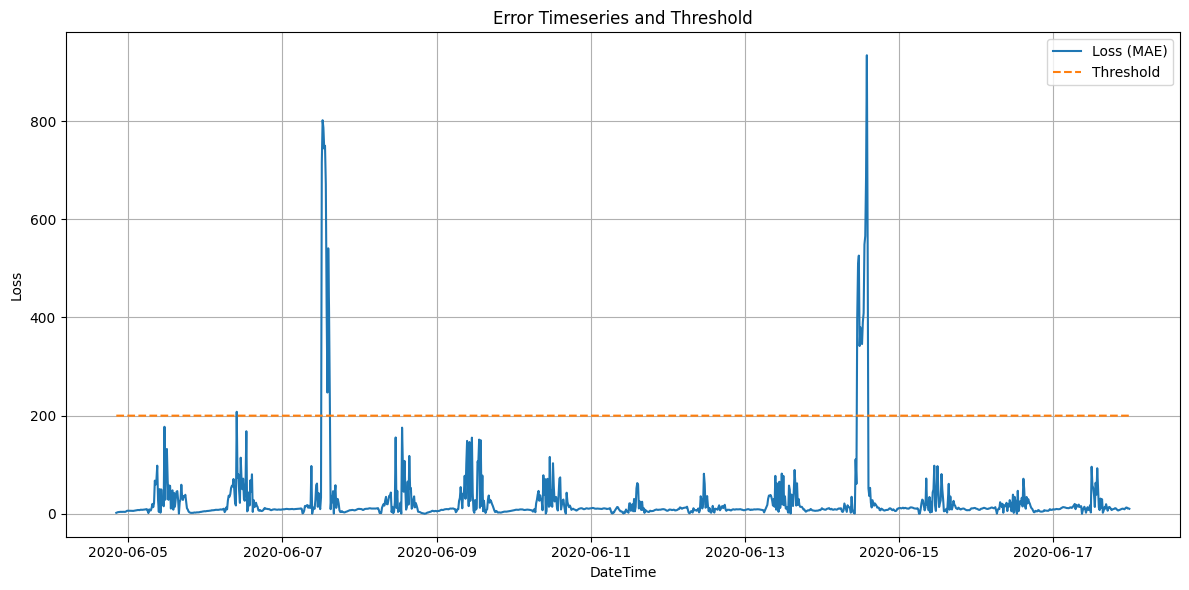

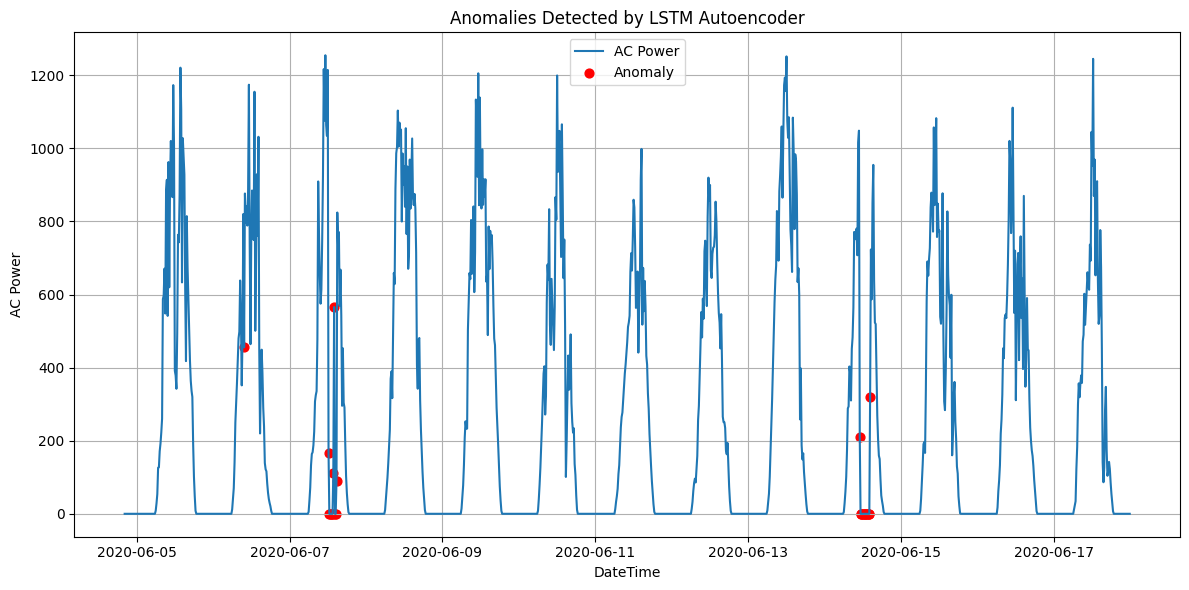

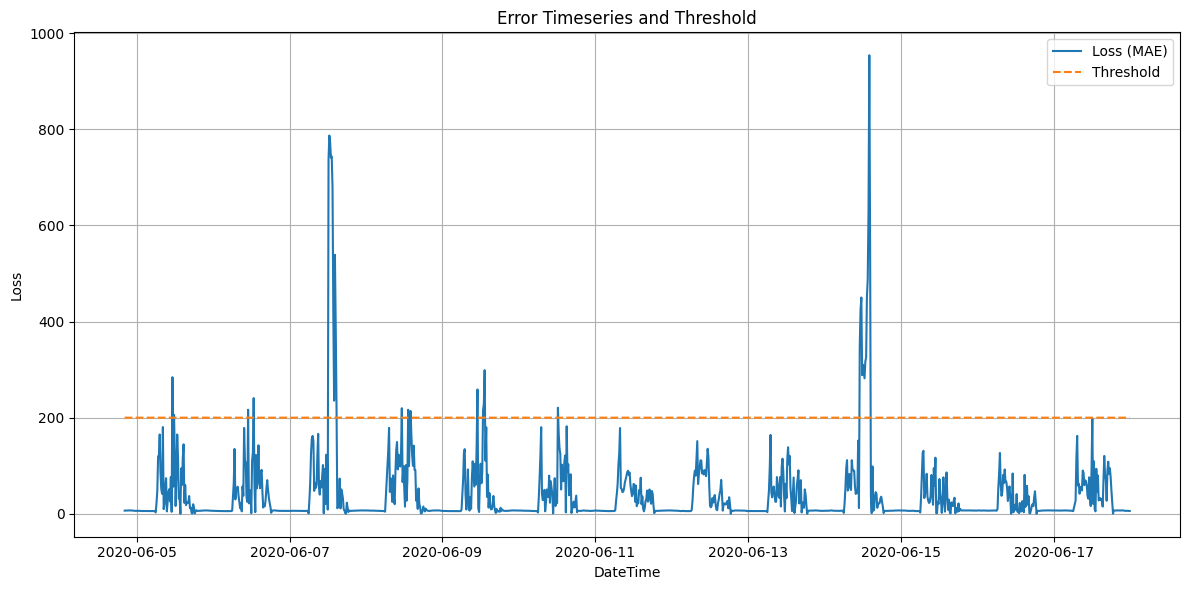

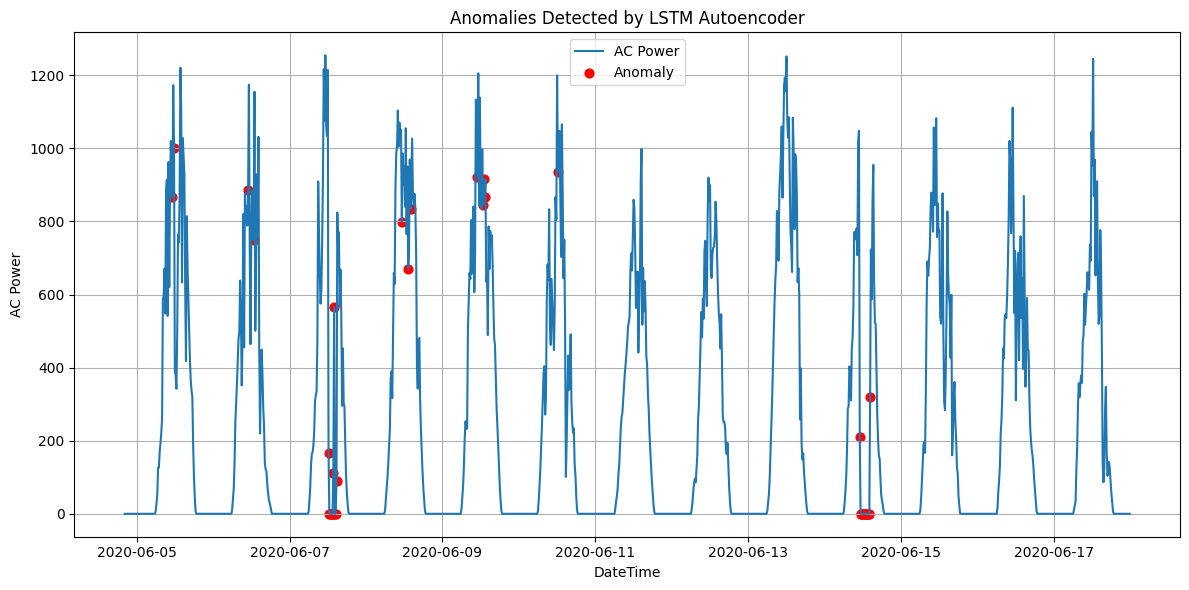

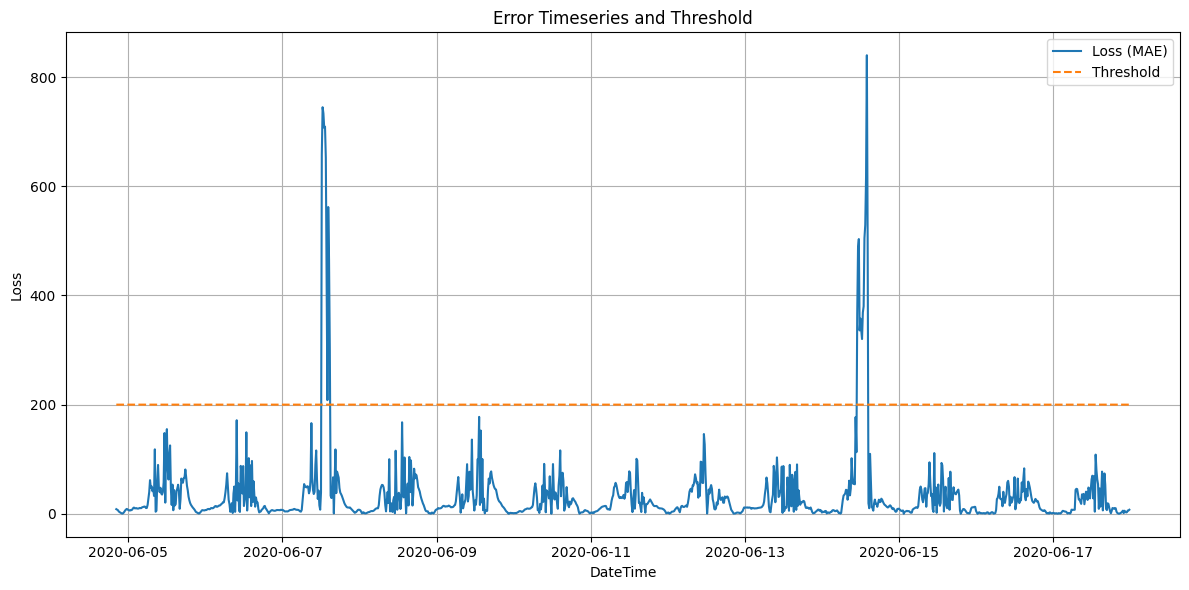

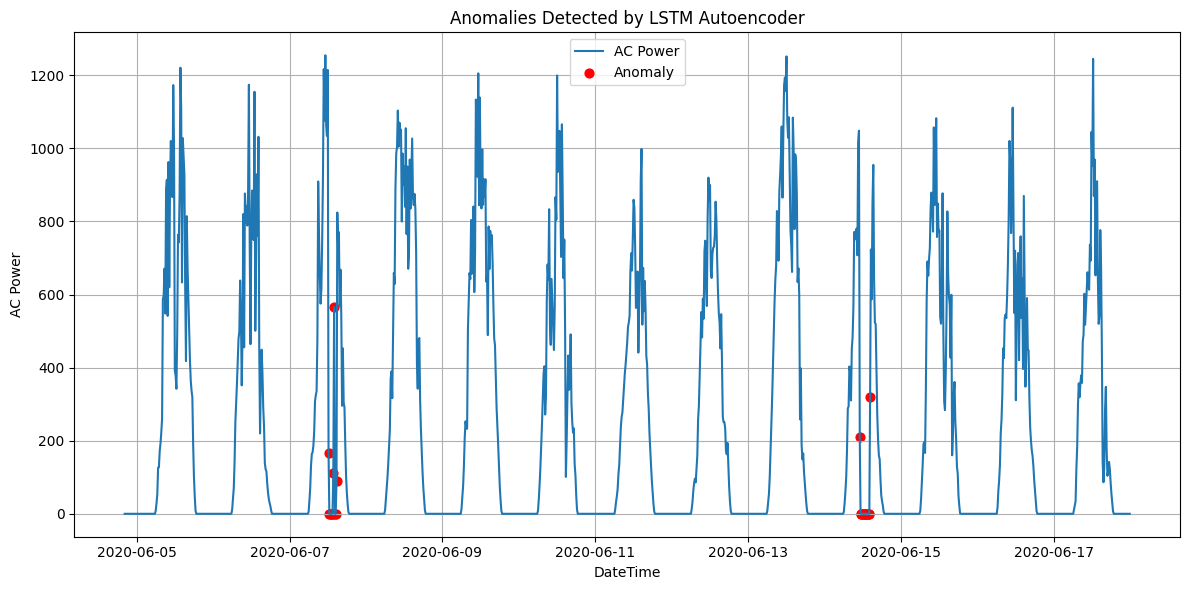

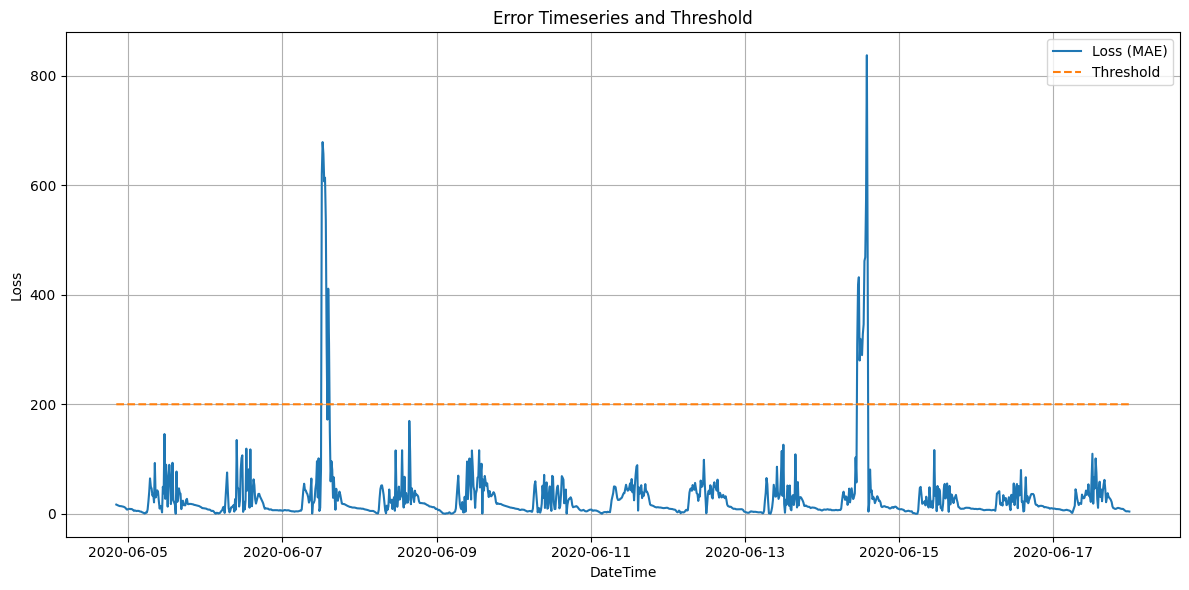

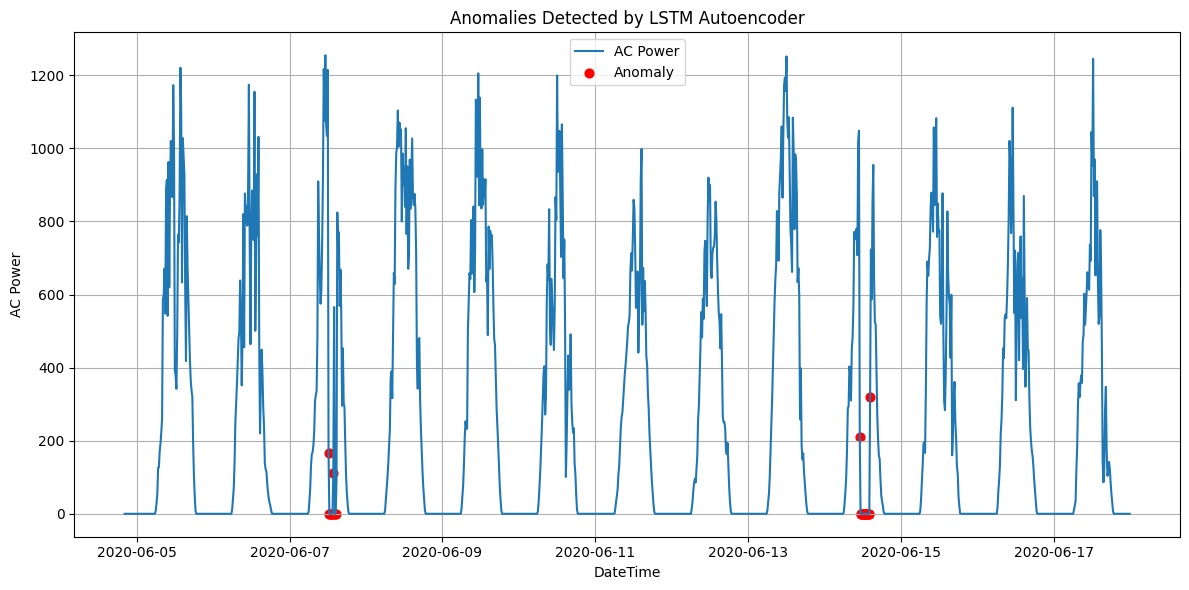

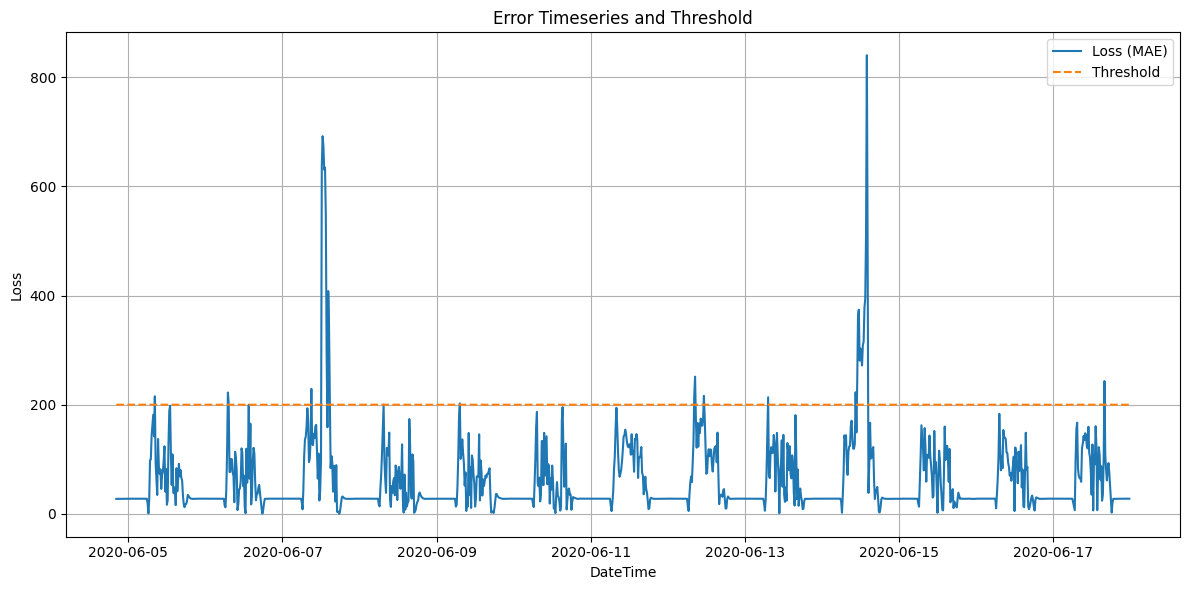

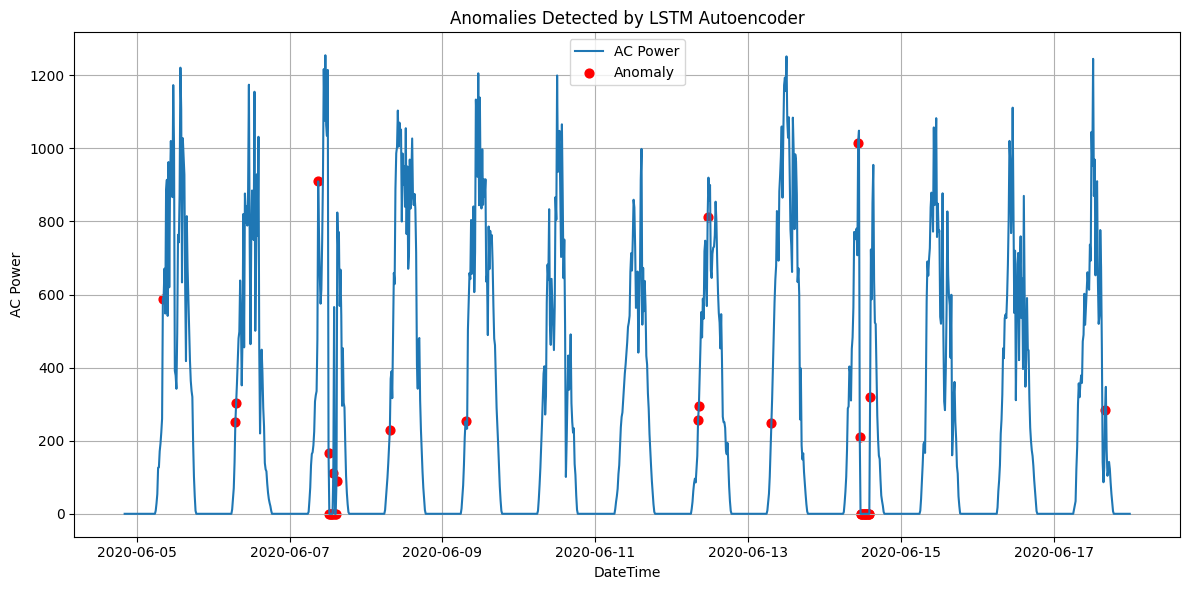

In [43]:
for batch_size_search in [10,15,20]:
    for learning_rate_search in [0.001,0.01,0.1]:
        with mlflow.start_run(log_system_metrics=True):
            epochs = 10
            batch_size = batch_size_search
            learning_rate = learning_rate_search

            mlflow.log_param("epochs", epochs)
            mlflow.log_param("batch_size", batch_size)
            mlflow.log_param("learning_rate", learning_rate)

            X_tensor = torch.tensor(X_train, dtype=torch.float32)
            dataset = TensorDataset(X_tensor, X_tensor)
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

            # model traning
            model = model_traning(epochs, learning_rate, dataloader)

            # model evaluation
            model.eval()
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            with torch.no_grad():
                X_pred = model(X_test_tensor).numpy()
            
            X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
            X_pred = scaler.inverse_transform(X_pred)
            X_pred = pd.DataFrame(X_pred, columns=train.columns)
            X_pred.index = test.index

            # visualization
            mae_visualization(X_pred)
            anomaly_visualization(X_pred)

            mlflow.log_metric("anomaly cnt", len(X_pred[X_pred['Anomaly'] == 1]))

            mlflow.log_artifact("./plot/model_mae_plot.png")
            mlflow.log_artifact("./plot/model_anomaly_plot.png")

            mlflow.pytorch.log_model(model, "model")

mlflow.end_run()